# Elliptic Curve Diffie-Hellman (ECDH)
Public key exchange protocol. Allows for securely establishing shared key over insecure public network for later use in symmetric cipher communication. Uses elliptic curve for public key generation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import typing

from generate_prime import generate_prime

## Elliptic curve
$ y^2 = x^3 + a*x + b $

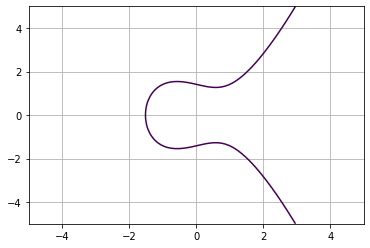

In [2]:
def plot_ec(a: int, b: int) -> None:
    y, x = np.ogrid[-5:5:100j, -5:5:100j]
    contour_line = pow(y, 2) - pow(x, 3) - a*x - b

    plt.contour(x.ravel(), y.ravel(), y**2 - x**3 - a*x - b, [0])
    plt.grid()

a = -1
b = 2
plot_ec(a, b)

## EC point addition
Operation always results in another elliptic curve point

To add two different points on EC we first find a line connecting these points. Then we find a point, where this line intersects EC. Given that point equals $ (x_i, y_i) $, result $ (x_r, y_r) $ will be equal to $ (x_i, -y_i) $

To add point by itself we find a tangent line and then do same operation.

Given two points $ (x_a, y_a), (x_b, y_b) $, line equation is described as $ \tilde{y} = \alpha*x + \beta $, where $ \alpha = \dfrac{y_b - y_a}{x_b - x_a} $. Intersaction with EC $(x_i, y_i)$ is then calculated from $ y = \tilde{y} $. Thus $ x_i = \alpha^2 - x_a - x_b $, $ y_i = \alpha(x_b - x_a) + y_a $. Result $ (x_r, y_r) = (x_i, -y_i) $

To double a point $ (x_p, y_p), \alpha = \dfrac{3*x_p^2 + a}{2*y_p} $ 

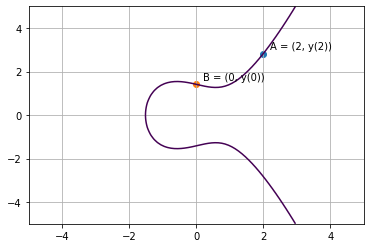

In [3]:
y = lambda x: np.sqrt(x**3 + a*x + b)

def add_point(x: int, letter: str = "G") -> None:

    plt.scatter(x, y(x))
    plt.annotate("{} = ({}, y({}))".format(letter, x, x), [x + 0.2, y(x) + 0.2])

plot_ec(a, b)
add_point(2, "A")
add_point(0, "B")

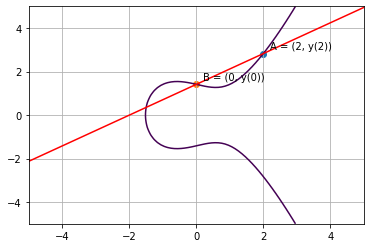

In [4]:
alpha = lambda a, b: (y(b) - y(a))/(b - a)

def add_connection_line(a: int, b: int) -> None:
    # y = alpha*x + beta
    beta = (y(a) - alpha(a, b)*a)

    x_line = np.linspace(-5, 5, 100)
    y_line = alpha(a, b)*x_line + beta

    plt.plot(x_line, y_line, '-r')

plot_ec(a, b)
A = 2
B = 0
add_point(A, "A")
add_point(B, "B")

add_connection_line(2, 0)

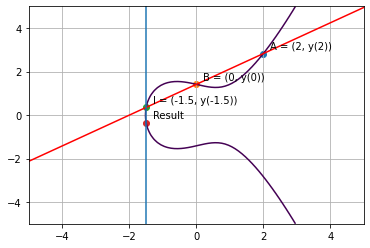

In [5]:
x_r = lambda alpha, a, b: alpha**2 - a - b
y_r = lambda alpha, a, b: alpha*(b - a) - y(a)

plot_ec(a, b)
add_point(A, "A")
add_point(B, "B")

add_connection_line(A, B)
x_i = x_r(alpha(A, B), A, B)
add_point(x_i, 'I')

plt.scatter(x_i, -y(x_i))
plt.annotate('Result', [x_i + 0.2, -y(x_i) + 0.2])
plt.plot([x_i, x_i], [-5, 5])

## Public key generation

Given selected generator $G$ find point on elliptic curve $ (G, y(G)) $. Given private key $a$, calculate $a*G$

In [6]:
Point = typing.Tuple[int, int]

def generate_public_key(private_key: int, generator: int) -> int:

    def double(P: Point) -> Point:
        if P is None:
            return None

        x_p, y_p = P 
        alpha = (3*x_p**2 + a) / (2*y_p) 
        x_i = alpha**2 - 2*x_p 
        y_i = y_p + alpha*(x_i - x_p)
        return (x_i, -y_i)


    def add(P: Point, Q: Point) -> Point:
        if P is None or Q is None:
            return P or Q

        x_p, y_p = P
        x_q, y_q = Q

        if x_p == x_q:
            return double(P)

        alpha = (y_p - y_q) / (x_p - x_q)
        x_i = alpha**2 - x_p - x_q
        y_i = y_p + alpha*(x_i - x_p)

        return (x_i, -y_i)

    def bits(n: int) -> typing.Iterable[int]:
        while n:
            yield n & 1
            n >>= 1

    R = None
    point_to_add = generator, y(G)
    for b in bits(private_key):
        if b:
            R = add(R, point_to_add)
        point_to_add = double(point_to_add)
    return R

    return ec_multiply(generator, private_key)

In [7]:
# EC parameters, public scope generator G
a = -7
b = 10
G = 3

private_key = generate_prime(256)
generate_public_key(private_key, G)

(-3.089978196644092, -1.4082737300620454)